# WeatherPy
----

### Observable Trends Based on the Data
* The Latitude vs. Temperature scatter plot shows that cities that are closer to the equator are high max temperatures. Also, one noticeable thing is that max temperatures of cities in the southern hemisphere roughly range between 40 °F and  110 °F, whereas max temperatures of cities in the northern hemisphere varied in the range of -10 °F and 100 °F. In other words, there are bigger differences between temperatures in the northern hemisphere cities compared to the southern hemisphere cities.
* Looking at the Latitude vs. Humidity scatter plot, it seems that there is no strong correlation between latitude and humidity. 
* The Latitude vs. Cloudiness scatter plot shows that there is no strong correlation between latitude and cloudiness. There are especially many cities with 0%, 40%, slightly under 80%, and 100% cloudiness, respectively, is also noteworthy.
* It seems that there is no strong correlation between latitude and wind speed according to the Latitude vs. Wind Speed scatter plot. Most of the cities have wind speeds in the range of 0 mph and 20 mph. Some cities in the northern hemisphere have relatively higher wind speeds compared to cities in the southern hemisphere. 
* Observable trends based on linear regression are the following:
    * There is a strong negative correlation between temperature and latitude for the cities in the northern hemisphere. The fact that the correlation coefficient was about -0.84 also shows this relationship.
    * There is a moderate positive correlation between temperature and latitude for the cities in the southern hemisphere. The fact that the correlation coefficient was about 0.68 also shows this relationship.
    * There is a weak positive correlation between humidity and latitude for the cities in the northern hemisphere. The fact that the correlation coefficient was about 0.35 also shows this relationship. 
    * There seems to be almost no correlation between humidity and latitude for the cities in the southern hemisphere. The correlation coefficient was about 0.09. 
    * There seems to be a very weak correlation or no significant correlation between cloudiness and latitude.
    * There is a very weak correlation or almost no corrleation between wind speed and latitude for the cities in the northern hemisphere. The correlation coefficient was about 0.23.
    * There is a weak negative correlation between wind speed and latitude for the cities in the southern hemisphere. The correlation coefficient was about -0.38.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
para = f"&appid={api_key}&units=imperial&q="

url = base_url + para

In [4]:
# Set up lists to hold response information
cloudiness = []
country_code = []
date = []
humidity = []
cities_lat = []
cities_lng = []
max_temp = []
wind_speed = []
cities_found = []


print('Beginning Data Retrieval')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
set_count = 0
set_num = 1

for city in cities:
    query_url = f"{url}{city}"
    response = requests.get(query_url).json()
    
    # Try to grab weather information if they are available
    try:
        cloudiness.append(response['clouds']['all'])
        country_code.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        cities_lat.append(response['coord']['lat'])
        cities_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        cities_found.append(city)
        
        # Each set will have 50 records
        set_count += 1
        if set_count == 51:
            set_num += 1
            set_count = 1
            # Add a five seconds interval between sets to stay within API query limits
            time.sleep(5)
        
        print(f"Processing Record {set_count} of Set {set_num} | {city}")

    # Handle exceptions for a city not available in the API
    except:
        print("City not found. Skipping...")
        pass
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mrakovo
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | omsukchan
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | todos santos
City not found. Skipping...
Processing Record 11 of Set 1 | kashmor
Processing Record 12 of Set 1 | emba
Processing Record 13 of Set 1 | honavar
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | san jose
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | ilebo
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 19 of Set 1 | hob

City not found. Skipping...
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | geilo
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | gao
Processing Record 44 of Set 4 | himeji
Processing Record 45 of Set 4 | port augusta
Processing Record 46 of Set 4 | petropavl
City not found. Skipping...
Processing Record 47 of Set 4 | nadym
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | chumikan
Processing Record 50 of Set 4 | genhe
Processing Record 1 of Set 5 | mabay
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | calvinia
Processing Record 4 of Set 5 | mersing
Processing Record 5 of Set 5 | lebu
City not found. Skipping...
Processing Record 6 of Set 5 | saint-augustin
Processing Record 7 of Set 5 | carballo
Processing Record 8 of Set 5 | kutum
Processing Record 9 of Set 5 | beloha
Processing Record 10 of Set 5 | kavaratti
Processing Record 11 of Set 5 | bulancak
Process

Processing Record 30 of Set 8 | ilulissat
Processing Record 31 of Set 8 | flinders
Processing Record 32 of Set 8 | tuy hoa
Processing Record 33 of Set 8 | blacksburg
Processing Record 34 of Set 8 | kamen-na-obi
Processing Record 35 of Set 8 | hokitika
Processing Record 36 of Set 8 | siirt
Processing Record 37 of Set 8 | mecca
Processing Record 38 of Set 8 | cabo san lucas
Processing Record 39 of Set 8 | kisangani
Processing Record 40 of Set 8 | honningsvag
Processing Record 41 of Set 8 | charagua
Processing Record 42 of Set 8 | boulder city
Processing Record 43 of Set 8 | altamont
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | qaqortoq
Processing Record 46 of Set 8 | fethiye
Processing Record 47 of Set 8 | alice springs
Processing Record 48 of Set 8 | kalmunai
Processing Record 49 of Set 8 | savinka
Processing Record 50 of Set 8 | balad
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 9 | roura
Processing Record 2 of Set 9 | san q

Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | clinton
Processing Record 23 of Set 12 | neryungri
Processing Record 24 of Set 12 | roald
Processing Record 25 of Set 12 | baykit
Processing Record 26 of Set 12 | wagrowiec
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    'City' : cities_found,
    'Cloudiness' : cloudiness,
    'Country' : country_code,
    'Date' : date,
    'Humidity' : humidity,
    'Lat' : cities_lat,
    'Lng' : cities_lng,
    'Max Temp' : max_temp,
    'Wind Speed' : wind_speed
}

weather_df = pd.DataFrame(weather_dict)

In [6]:
# Display the DataFrame
print(weather_df.count())
weather_df.head()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,81,EC,1604761888,72,-0.74,-90.35,71.01,7.00
1,port alfred,34,ZA,1604762167,74,-33.59,26.89,72.50,18.10
2,mrakovo,100,RU,1604762700,92,52.72,56.62,37.15,6.02
3,cape town,40,ZA,1604762175,68,-33.93,18.42,66.20,29.97
4,ponta do sol,40,PT,1604762202,68,32.67,-17.10,69.80,10.29


In [7]:
# Export the city data into a csv file
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

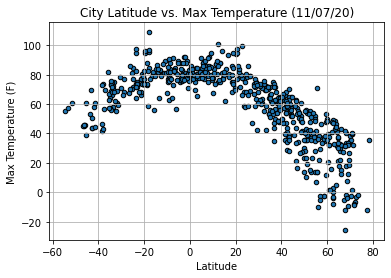

In [8]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors='black', facecolors='lightblue')

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid()

plt.savefig("output_data/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

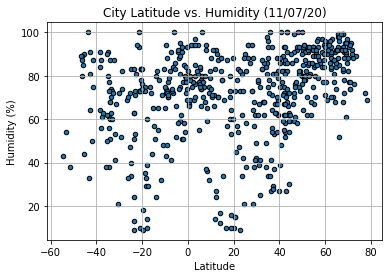

In [9]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', facecolors='lightblue')

plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%y")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

plt.savefig("output_data/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

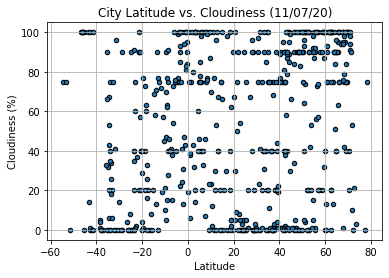

In [10]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', facecolors='lightblue')

plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%y")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()

plt.savefig("output_data/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

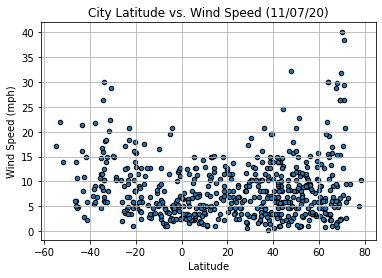

In [11]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', facecolors='lightblue')

plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%y")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

plt.savefig("output_data/lat_vs_windspeed.png")
plt.show()

### Linear Regression

In [12]:
# Define northern/southern hemisphere
northern_hemisphere_df = weather_df[weather_df['Lat'] > 0]
southern_hemisphere_df = weather_df[weather_df['Lat'] < 0]

northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,mrakovo,100,RU,1604762700,92,52.72,56.62,37.15,6.02
4,ponta do sol,40,PT,1604762202,68,32.67,-17.10,69.80,10.29
5,omsukchan,100,RU,1604762701,90,62.53,155.80,0.27,4.68
7,georgetown,40,MY,1604762110,83,5.41,100.34,80.60,2.24
9,todos santos,3,MX,1604762135,81,23.45,-110.22,77.00,4.65
...,...,...,...,...,...,...,...,...,...
571,clinton,75,US,1604762843,67,42.59,-82.92,61.00,8.05
572,neryungri,74,RU,1604762843,89,56.67,124.65,-5.13,5.21
573,roald,75,NO,1604762289,93,62.58,6.13,46.99,4.70
574,baykit,100,RU,1604762844,94,61.67,96.37,15.51,2.37


In [13]:
# Create a function to calculate regression values and creat linear regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, annotate_point):

    slope, intercept, r, p, std_err = stats.linregress(x_values, y_values)
    
    # Regression values
    regression_values = slope * x_values + intercept
    
    # Create a equation of line    
    eq_line = f"{round(slope, 2)}x + {round(intercept, 2)}"

    # Create a plot
    plt.scatter(x_values, y_values, edgecolors='black', facecolors='lightblue')
    
    plt.plot(x_values, regression_values, color='red')
    plt.annotate(eq_line, annotate_point, color='red', fontsize=16)
    
    plt.title(f'{hemisphere} - {y_label} vs. {x_label} ({time.strftime("%m/%d/%y")})')
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
               
    plt.grid()

    plt.savefig(f"output_data/{hemisphere}-{y_label}_vs_{x_label}-linear_regression.png")
    plt.show()
    
    print(f'The correlation coefficient is {r}.')
    print(f'r square value is {r**2}.')

#### Northern Hemisphere - Temperature (F) vs. Latitude

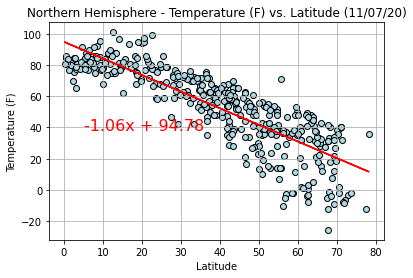

The correlation coefficient is -0.8435822071172918.
r square value is 0.7116309401648814.


In [14]:
northern_lat = northern_hemisphere_df['Lat']
northern_temp = northern_hemisphere_df['Max Temp']

lat_label = "Latitude"
temp_label = "Temperature (F)"

northern_hemisphere = "Northern Hemisphere"

linear_regression_plot(northern_lat, northern_temp, lat_label, temp_label, northern_hemisphere, (5, 38))

#### Southern Hemisphere - Temperature (F) vs. Latitude

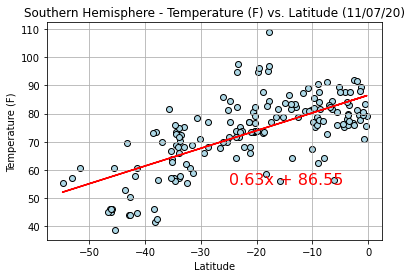

The correlation coefficient is 0.6800913423519549.
r square value is 0.4625242339420839.


In [15]:
southern_lat = southern_hemisphere_df['Lat']
southern_temp = southern_hemisphere_df['Max Temp']

southern_hemisphere = "Southern Hemisphere"

linear_regression_plot(southern_lat, southern_temp, lat_label, temp_label, southern_hemisphere, (-25, 55))

#### Northern Hemisphere - Humidity (%) vs. Latitude

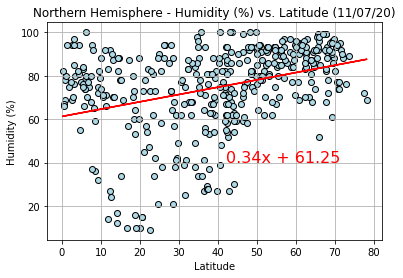

The correlation coefficient is 0.345474421679297.
r square value is 0.1193525760346447.


In [16]:
northern_humidity = northern_hemisphere_df['Humidity']

humidity_label = 'Humidity (%)'

linear_regression_plot(northern_lat, northern_humidity, lat_label, humidity_label, northern_hemisphere, (42, 40))

#### Southern Hemisphere - Humidity (%) vs. Latitude

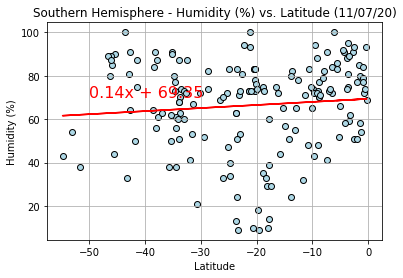

The correlation coefficient is 0.094396902975537.
r square value is 0.008910775291372946.


In [17]:
southern_humidity = southern_hemisphere_df['Humidity']

linear_regression_plot(southern_lat, southern_humidity, lat_label, humidity_label, southern_hemisphere, (-50, 70))

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

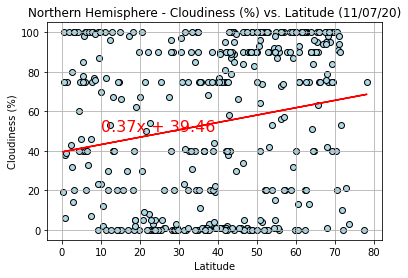

The correlation coefficient is 0.19178987891825067.
r square value is 0.03678335765547725.


In [18]:
northern_cloudiness = northern_hemisphere_df['Cloudiness']

cloudiness_label = 'Cloudiness (%)'

linear_regression_plot(northern_lat, northern_cloudiness, lat_label, cloudiness_label, northern_hemisphere, (10, 50))

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

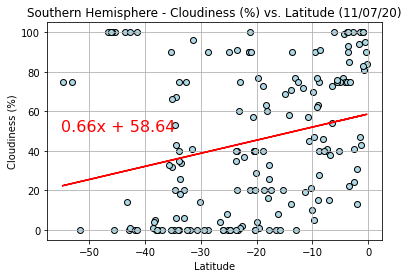

The correlation coefficient is 0.2561716795285287.
r square value is 0.06562392939246721.


In [19]:
southern_cloudiness = southern_hemisphere_df['Cloudiness']

linear_regression_plot(southern_lat, southern_cloudiness, lat_label, cloudiness_label, southern_hemisphere, (-55, 50))

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

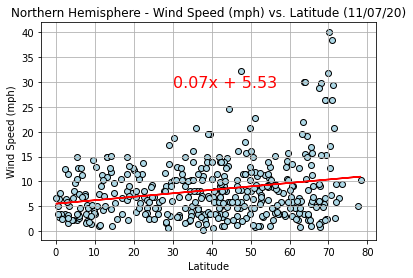

The correlation coefficient is 0.23208110792683484.
r square value is 0.05386164065654716.


In [20]:
northern_wind_speed = northern_hemisphere_df['Wind Speed']

wind_speed_label = 'Wind Speed (mph)'

linear_regression_plot(northern_lat, northern_wind_speed, lat_label, wind_speed_label, northern_hemisphere, (30, 29))

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

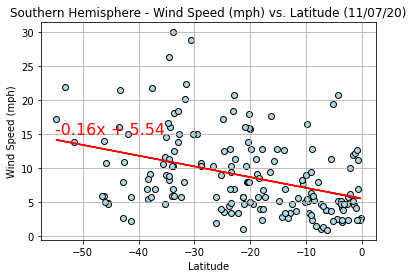

The correlation coefficient is -0.377673119739455.
r square value is 0.1426369853737327.


In [21]:
southern_wind_speed = southern_hemisphere_df['Wind Speed']

linear_regression_plot(southern_lat, southern_wind_speed, lat_label, wind_speed_label, southern_hemisphere, (-55, 15))